## 3.2.6 Challenge: If a tree falls in the forest...

## Problem Statement

Now that you've learned about random forests and decision trees let's do an exercise in accuracy. You know that random forests are basically a collection of decision trees. But how do the accuracies of the two models compare?

So here's what you should do. Pick a dataset. It could be one you've worked with before or it could be a new one. Then build the best decision tree you can.

Now try to match that with the simplest random forest you can. For our purposes measure simplicity with runtime. Compare that to the runtime of the decision tree. This is imperfect but just go with it.

Hopefully out of this you'll see the power of random forests, but also their potential costs. Remember, in the real world you won't necessarily be dealing with thousands of rows. It could be millions, billions, or even more.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import ensemble # Random Forest model
from sklearn.model_selection import cross_val_score
from sklearn import tree # Decision tree model
from IPython.display import Image # Display tree
import pydotplus # Render tree
import graphviz # Render tree
import time
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from sklearn.model_selection import GridSearchCV

%matplotlib inline

In [2]:
data_GBP = '/home/mache/Desktop/Thinkful/Course/Unit 3/Forest/GBPUSD_15 Mins_Bid_2017.08.02_2018.04.26.csv'
df_gbp = pd.read_csv(data_GBP)
print (df_gbp.shape)

(18379, 6)


In [3]:
df_gbp.rename(columns = {'Time (ART)': 'Time_ART'}, inplace=True)

In [4]:
df_gbp['Time_ART'] = pd.to_datetime(df_gbp.Time_ART)

In [5]:
df_gbp.head()

,Time_ART,Open,High,Low,Close,Volume
0,2017-08-02 00:00:00,1.32039,1.32046,1.32001,1.32039,928.33
1,2017-08-02 00:15:00,1.32038,1.32044,1.31955,1.31980,885.60
2,2017-08-02 00:30:00,1.31978,1.32004,1.31952,1.31988,895.00
3,2017-08-02 00:45:00,1.31986,1.31997,1.31959,1.31979,492.38
4,2017-08-02 01:00:00,1.31979,1.32052,1.31965,1.32009,1461.16


In [6]:
data_UKX = '/home/mache/Desktop/Thinkful/Course/Unit 3/Forest/GBRIDXGBP_15 Mins_Bid_2017.08.02_2018.04.26.csv'
df_ukx = pd.read_csv(data_UKX)
print (df_ukx.shape)

(18379, 6)


In [7]:
df_ukx.rename(columns = {'Time (ART)': 'Time_ART'}, inplace=True)

In [8]:
df_ukx['Time_ART'] = pd.to_datetime(df_ukx.Time_ART)

In [9]:
df_ukx.head(5)

,Time_ART,Open,High,Low,Close,Volume
0,2017-08-02 00:00:00,7422.969,7422.969,7422.969,7422.969,0.0
1,2017-08-02 00:15:00,7422.969,7422.969,7422.969,7422.969,0.0
2,2017-08-02 00:30:00,7422.969,7422.969,7422.969,7422.969,0.0
3,2017-08-02 00:45:00,7422.969,7422.969,7422.969,7422.969,0.0
4,2017-08-02 01:00:00,7422.969,7422.969,7422.969,7422.969,0.0


#### Merging both datasets

In [10]:
df = pd.merge(df_gbp, df_ukx, on=['Time_ART'])

#### Converting Time_ART in index

In [11]:
df = df.set_index('Time_ART')

In [12]:
df.head(5)

,Open_x,High_x,Low_x,Close_x,Volume _x,Open_y,High_y,Low_y,Close_y,Volume _y
Time_ART,,,,,,,,,,
2017-08-02 00:00:00,1.32039,1.32046,1.32001,1.32039,928.33,7422.969,7422.969,7422.969,7422.969,0.0
2017-08-02 00:15:00,1.32038,1.32044,1.31955,1.31980,885.60,7422.969,7422.969,7422.969,7422.969,0.0
2017-08-02 00:30:00,1.31978,1.32004,1.31952,1.31988,895.00,7422.969,7422.969,7422.969,7422.969,0.0
2017-08-02 00:45:00,1.31986,1.31997,1.31959,1.31979,492.38,7422.969,7422.969,7422.969,7422.969,0.0
2017-08-02 01:00:00,1.31979,1.32052,1.31965,1.32009,1461.16,7422.969,7422.969,7422.969,7422.969,0.0


### Holdout before applying PCA or doing any analysis

In [13]:
# Define X and Y
X = df[['High_x', 'Low_x', 'Close_x', 'Volume _x', 'Open_y', 'High_y', 'Low_y', 'Close_y', 'Volume _y']]
Y = df['Open_x']

In [14]:
print('X shape:', X.shape)
print('Y shape:', Y.shape)

X shape: (18379, 9)
Y shape: (18379,)


In [15]:
#test_size: what proportion of original data is used for test set (20%)

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.20, random_state=0)

In [16]:
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

X_train shape: (14703, 9)
Y_train shape: (14703,)


In [17]:
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)

X_test shape: (3676, 9)
Y_test shape: (3676,)


In [18]:
X_test.head(5)

,High_x,Low_x,Close_x,Volume _x,Open_y,High_y,Low_y,Close_y,Volume _y
Time_ART,,,,,,,,,
2017-10-03 07:45:00,1.32680,1.32576,1.32578,2818.48,7443.469,7448.270,7443.270,7448.269,0.03100
2018-04-16 05:00:00,1.42719,1.42555,1.42575,1914.53,7256.169,7262.340,7255.889,7258.839,0.11880
2017-08-31 03:45:00,1.29200,1.29138,1.29162,1926.32,7382.270,7383.270,7381.469,7382.970,0.01440
2018-02-08 08:00:00,1.39003,1.38884,1.38947,2741.68,7217.439,7220.939,7211.280,7219.099,0.17754
2017-08-10 21:45:00,1.29848,1.29817,1.29829,462.41,7347.969,7347.969,7347.969,7347.969,0.00000


In [19]:
#Scaling data
scaler = StandardScaler()

#Fit on training set only
scaler.fit(X_train)

#Applying transform to both the training and test set
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
X_train

array([[-0.31031414, -0.30928597, -0.31925372, ...,  0.53028143,
         0.52355378,  0.53777628],
       [ 0.50042695,  0.47619709,  0.50976291, ..., -1.22804011,
        -1.11015985, -0.14557118],
       [-0.84076363, -0.83701741, -0.83265975, ...,  0.7883499 ,
         0.77917857, -0.03066288],
       ..., 
       [-0.38660512, -0.37953827, -0.37983755, ...,  1.04001194,
         1.034798  , -0.13933507],
       [ 0.05224736,  0.04269484,  0.06029318, ...,  1.684395  ,
         1.69822421,  2.6777825 ],
       [-0.80776001, -0.8070463 , -0.80703734, ...,  0.03497206,
         0.03589407, -0.38852876]])

## Decision Tree GridSearchCV Depth

In [21]:
parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(tree.DecisionTreeRegressor(), parameters, n_jobs=4)
clf.fit(X=X_train, y=Y_train)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_)

0.999835041094 {'max_depth': 11}


### GridSearchCV + PCA + Decision Tree

In [22]:
param_grid = {'n_components': np.arange(2, X_train.shape[1])}

In [23]:
gs = GridSearchCV(estimator=PCA(), 
                  param_grid=param_grid, 
                  cv=3)

In [24]:
gs = gs.fit(X_train, Y_train)
print(gs.best_score_)
print(gs.best_params_)

8.85981663806
{'n_components': 8}


In [25]:
all_scores = []
for i in range(2, X_train.shape[1]):
    PCA().n_components = i
    scores = cross_val_score(PCA(),X_train,Y_train,cv=3)
    all_scores.append(np.mean(scores))
    print(i,np.mean(scores))

print('Best result:',all_scores.index(max(all_scores)),max(all_scores))

2 8.85981663806
3 8.85981663806
4 8.85981663806
5 8.85981663806
6 8.85981663806
7 8.85981663806
8 8.85981663806
Best result: 0 8.85981663806


n_components = 2 is the best result.

In [26]:
#PCA
pca = PCA(n_components=2)

In [27]:
#Fitting PCA to training set only
principalComponents = pca.fit_transform(X_train)

In [28]:
PCA_train = pd.DataFrame(data=principalComponents, columns = ['pc_1', 'pc_2'])

In [29]:
PCA_train.head(5)

,pc_1,pc_2
0,-1.206687,0.361169
1,2.481284,-0.260178
2,-2.102765,-0.395135
3,-1.849763,-0.735810
4,-1.285583,-0.717147


In [30]:
# Initialize and train our tree.
dt_start_time = time.time()
decision_tree = tree.DecisionTreeRegressor(
    criterion='mse',
    max_features=2,
    max_depth=10,
    random_state = 1337
)
decision_tree_model = decision_tree.fit(PCA_train, Y_train)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.359366 to fit



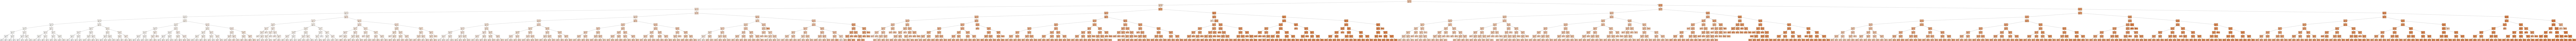

In [31]:
# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=PCA_train.columns,
    class_names=['Not Returning', 'Returning'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [32]:
#Fitting PCA to test set only
principalComponents_test = pca.fit_transform(X_test)

In [33]:
PCA_test = pd.DataFrame(data=principalComponents_test, columns = ['pc_1', 'pc_2'])

In [34]:
PCA_test.head(5)

,pc_1,pc_2
0,-1.100144,-0.217340
1,2.828058,1.539054
2,-1.355511,-1.919408
3,2.353721,0.512389
4,-0.928390,-2.425433


In [35]:
display(cross_val_score(decision_tree_model, PCA_test, Y_test, cv = 5))
print ("Decision Tree runtime: {}".format(time.time() - dt_start_time))

array([ 0.97164212,  0.96625389,  0.95723658,  0.97538793,  0.97800831])

Decision Tree runtime: 15.229735851287842


In [36]:
prediction_decision_tree = decision_tree_model.predict(PCA_test)

In [37]:
prediction_decision_tree_DF = pd.DataFrame(prediction_decision_tree, columns=['Prediction_result'])

In [38]:
prediction_decision_tree_DF.head(5)

,Prediction_result
0,1.330722
1,1.419874
2,1.297558
3,1.396378
4,1.297313


In [39]:
prediction_decision_tree_DF.shape

(3676, 1)

In [40]:
Y_test.shape

(3676,)

In [41]:
Y_test.head()

Time_ART
2017-10-03 07:45:00    1.32610
2018-04-16 05:00:00    1.42578
2017-08-31 03:45:00    1.29159
2018-02-08 08:00:00    1.38976
2017-08-10 21:45:00    1.29818
Name: Open_x, dtype: float64

How can I convert the "Prediction_result" index into the Time_ART, so I can compare it visually with the Y_test df.

### GridSearchCV + SelectKbest + Decision Tree

In [42]:
param_grid_SKB = {'k': [1, 2, 3, 4, 5]}

In [43]:
gs_SKB = GridSearchCV(estimator=SelectKBest(), scoring=f_regression, 
                  param_grid=param_grid_SKB, 
                  cv=3)

In [44]:
#Converting X_train to an integer
X_train_SKB = X_train.astype(int)
Y_train_SKB = Y_train.astype(int)



In [45]:
gs_SKB = gs_SKB.fit(X_train_SKB, Y_train_SKB)

/home/mache/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:108: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / float(dfbn)


TypeError: float() argument must be a string or a number, not 'SelectKBest'

#### Choosing k randomnly

In [46]:
SKB_selector = SelectKBest(f_regression, k=2)

In [47]:
X_kbest = SKB_selector.fit_transform(X_train, Y_train)

In [48]:
# Show results
print('Original number of features:', X_train.shape[1])
print('Reduced number of features:', X_kbest.shape[1])

Original number of features: 9
Reduced number of features: 2


In [49]:
SKB_train = pd.DataFrame(data=X_kbest, columns = ['pc_1', 'pc_2'])

In [50]:
SKB_train.head(5)

,pc_1,pc_2
0,-0.310314,-0.309286
1,0.500427,0.476197
2,-0.840764,-0.837017
3,-0.885247,-0.872503
4,-0.700618,-0.693396


In [51]:
# Initialize and train our tree.
dt_start_time = time.time()
decision_tree_SKB = tree.DecisionTreeRegressor(
    criterion='mse',
    max_features=2,
    max_depth=10,
    random_state = 1337
)
decision_tree_model_SKB = decision_tree_SKB.fit(SKB_train, Y_train)

In [52]:
# Render our tree.
dot_data_skb = tree.export_graphviz(
    decision_tree_SKB, out_file=None,
    feature_names=SKB_train.columns,
    class_names=['Not Returning', 'Returning'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data_skb)
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.565836 to fit



IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [53]:
#Fitting SKB to test set only
SKB_test = SKB_selector.fit_transform(X_test, Y_test)

In [54]:
display(cross_val_score(decision_tree_model_SKB, SKB_test, Y_test, cv = 5))
print ("Decision Tree runtime: {}".format(time.time() - dt_start_time))

array([ 0.99982426,  0.99972716,  0.99969614,  0.99977852,  0.99976979])

Decision Tree runtime: 14.2173912525177


In [55]:
prediction_decision_tree_SKB = decision_tree_model_SKB.predict(SKB_test)

In [56]:
prediction_decision_tree_SKB = pd.DataFrame(prediction_decision_tree_SKB, columns=['Prediction_result'])
print(prediction_decision_tree_SKB.head(5))

   Prediction_result
0           1.326231
1           1.426035
2           1.291720
3           1.389495
4           1.298733


## Random Forest

In [57]:
parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(ensemble.RandomForestRegressor(), parameters, n_jobs=4)
clf.fit(X=X_train, y=Y_train)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_)

0.999886896862 {'max_depth': 14}


In [58]:
# Random Forest
rf_start_time = time.time()
rfc = ensemble.RandomForestRegressor(max_depth=10)
display(cross_val_score(rfc, X_test, Y_test, cv=5))
print ("Random Forest runtime: {}".format(time.time() - rf_start_time))

array([ 0.99988823,  0.99982591,  0.99981145,  0.99983028,  0.99982867])

Random Forest runtime: 0.7309491634368896


### PCA + Random Forest

Using the df from the results used for the Decision Trees

In [59]:
# Random Forest
rf_start_time = time.time()
rfc = ensemble.RandomForestRegressor(max_depth=10)
display(cross_val_score(rfc, PCA_test, Y_test, cv=5))
print ("Random Forest runtime: {}".format(time.time() - rf_start_time))

array([ 0.98001378,  0.97638669,  0.96988822,  0.97871947,  0.9812097 ])

Random Forest runtime: 0.31202220916748047


### SelectKbest + Random Forest

Using the df from the results used for the Decision Trees

In [60]:
# Random Forest
rf_start_time = time.time()
rfc = ensemble.RandomForestRegressor(max_depth=10)
display(cross_val_score(rfc, SKB_test, Y_test, cv=5))
print ("Random Forest runtime: {}".format(time.time() - rf_start_time))

array([ 0.99990197,  0.99982845,  0.99979607,  0.99985933,  0.99983302])

Random Forest runtime: 0.28437328338623047
